In [1]:
import tensorflow as tf
#from os import path, getcwd, chdir
#path = f"{getcwd()}/../tmp2/mnist.npz"

In [26]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
               if(logs.get('accuracy')>0.99):
                   print("\nReached 60% accuracy so cancelling training!")
                   self.model.stop_training = True
  



In [27]:
mnist = tf.keras.datasets.mnist
  

In [28]:
(x_train, y_train),(x_test,y_test)= mnist.load_data()


In [11]:
import matplotlib.pyplot as plt

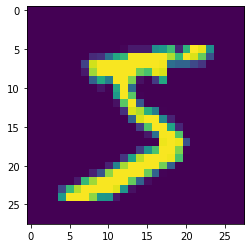

In [12]:
plt.imshow(x_train[0])

In [29]:
x_train=x_train/255.0

In [30]:
x_test=x_test/255.0

In [31]:
callbacks=myCallback()

In [32]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [33]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2009 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0810 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0370 - accuracy: 0.9887
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9911
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9911


In [35]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9804


[0.06604138016700745, 0.980400025844574]